# 1. Empirisches Projekt
---
Dieses Sktipt soll euch helfen eine Datenanalyse sowie eine Regression aufzubauen.
-> Falls ihr fragen habt bitte sagt mir bescheid ich helfe gerne aus!

Für die Datenanalyse kann als unterstützung der Leitfaden "Leitfaden.ipynbn" als unterstützung genutzt werden.
Ab Punkt 2. wird erklärt wie Libaries installiert werden und wie die Daten eingelesen werden können. Sowie weitere Schritte zur Datenanalyse.

In [5]:
import os
if not os.path.exists("Daten"):
    os.makedirs("Daten") 
elif os.path.exists("Daten"):
    print("Ordner ist bereits vorhanden")

# Erstellt dir ein Ordner wo du deine Daten speichern kannst

Ordner ist bereits vorhanden


Füge hier alle benötigten Libaries ein:

In [6]:
import importlib
import subprocess
import sys

def install_and_import(package):
    try:
        # Überprüfen, ob das Paket bereits installiert ist
        importlib.import_module(package)
        print(f"'{package}' ist bereits installiert.")
    except ImportError:
        # Falls das Paket nicht installiert ist, wird es installiert
        print(f"'{package}' wird installiert.")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])


install_and_import('pandas')  # Ersetzt 'numpy' mit dem gewünschten Paketnamen

'pandas' ist bereits installiert.


In [3]:
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

#### Lese hier deine Daten ein:
---

gebe dazu in den "`Path to your file"` wo deine Datei liegt, sowie den passenden Seprator

In [5]:
df = pd.read_csv("Daten/wage.csv", sep=';')

#### Begutachte deine Daten:

In [6]:
# gebe dir die ersten 5 reihen des Datensatzes aus:
df.head()

,wage,educ,exper,metro
0,2.07,12,7,1
1,2.12,12,35,1
2,2.54,16,20,1
3,2.68,12,24,1
4,3.09,13,4,1


In [7]:
Reihen, Spalten = df.shape

# gebe die Anzahl der Reihen und Spalten aus:
print("Anzahl der Reihen: ", Reihen)
print("Anzahl der Spalten: ", Spalten)

Anzahl der Reihen:  998
Anzahl der Spalten:  4


Im folgenden Code wirst du eine Statitische Zusammenfassung des Datensatzes erhalten.
Nimm dir eigene Minuten Zeit dein Daten satz zu analysieren und die wichtigsten Informationen herauszufinden.

- Hinterfrage deine Daten und versuche Zusammenhänge zu finden.

In [8]:
df.describe().round(2)

,wage,educ,exper,metro
count,998.00,998.00,998.00,998.00
mean,10.23,13.29,18.79,0.81
std,6.24,2.47,11.32,0.39
min,2.07,1.00,0.00,0.00
25%,5.53,12.00,10.00,1.00
50%,8.82,13.00,18.00,1.00
75%,12.84,16.00,26.00,1.00
max,60.19,18.00,52.00,1.00


Solltest du im folgenden mehrere NaN values haben, wähle eine der folgenden Optionen:
1. Lösche die Zeilen mit NaN values
2. Fülle die NaN values mit einem Wert deiner Wahl
3. Fülle die NaN values mit dem Durchschnittswert der Spalte (mean, mode, median)

In [9]:
df.isnull().sum()

wage     0
educ     0
exper    0
metro    0
dtype: int64

In [10]:
# Lösche die Zeilen mit NaN values 
#df = df.dropna()

# Fülle die NaN values mit einem Wert deiner Wahl
#df = df.fillna()

# Fülle die NaN values mit dem Durchschnittswert der Spalte
#df = df.fillna(df.mean()) #<- mean(), mode(), median()

weitere Informationen findest du im Leitfaden
Daten filterung:

1. Filterung nach einer Kondition:

`df_filtered = df[df["wage"] > 12.00]`

2. Filterung mit mehreren Kondition 

`df_filtered_educ = df[(df["wage"] > 12.00) & (df["educ"] == 12)]`


In [11]:
df_filtered_educ = df[(df["wage"] > 12.00) & (df["educ"] == 12) & (df["metro"] == 0)] # Beachte das du nun deine Spalten namen hinzufügen musst
df_filtered_educ

,wage,educ,exper,metro
723,12.400000,12,25,0
760,13.100000,12,24,0
810,14.730000,12,42,0
862,16.209999,12,29,0
866,16.370001,12,22,0
902,18.330000,12,40,0
975,26.980000,12,45,0


Text(0.5, 1.0, 'Histogramm des Lohns')

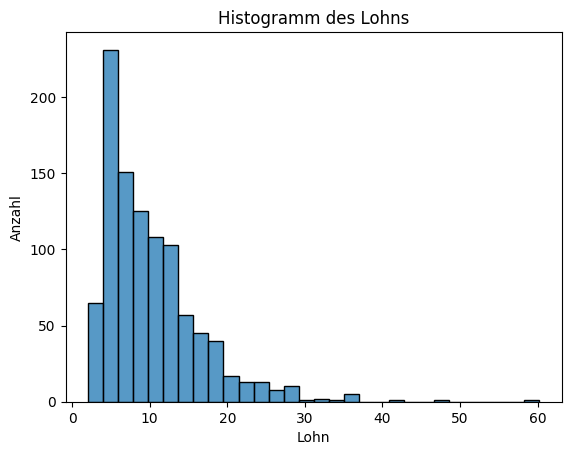

In [12]:
sns.histplot(data=df, x="wage", bins=30)
plt.xlabel("Lohn")
plt.ylabel("Anzahl")
plt.title("Histogramm des Lohns")

<Axes: >

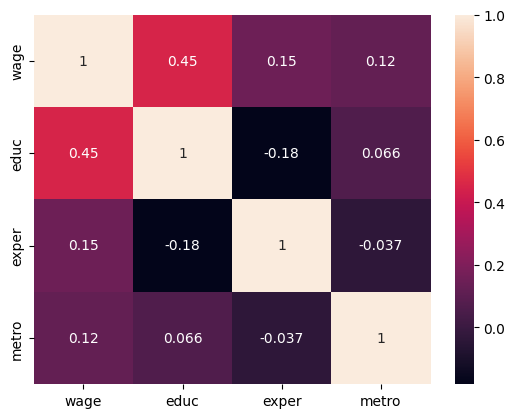

In [28]:
sns.heatmap(df.corr(), annot=True)

## Scatterplot
---

Text(0.5, 1.0, 'Scatterplot von Erfahrung und Lohn')

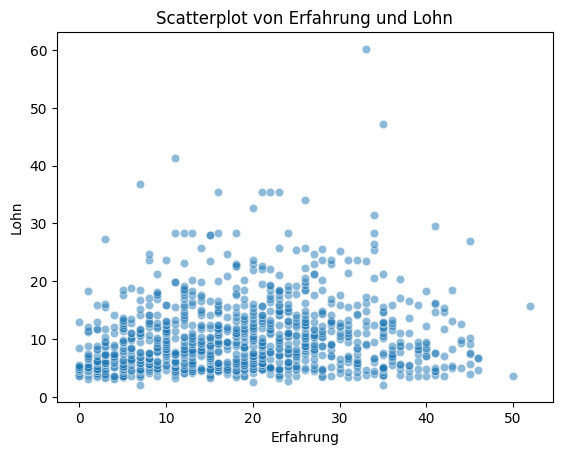

In [14]:
sns.scatterplot(data=df, x="exper", y="wage", alpha=0.5)
plt.xlabel("Erfahrung")
plt.ylabel("Lohn")
plt.title("Scatterplot von Erfahrung und Lohn")

## Balkendiagramm
---

Text(0.5, 1.0, 'Barplot von Metro und Lohn')

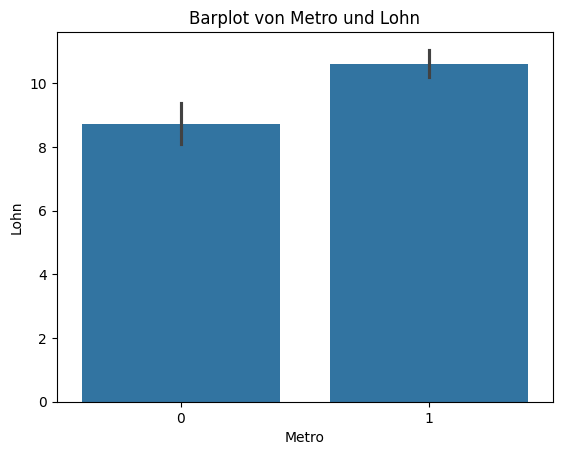

In [15]:
sns.barplot(data=df, x="metro", y="wage")
plt.xlabel("Metro")
plt.ylabel("Lohn")
plt.title("Barplot von Metro und Lohn")

## Regressions Analyse

In [16]:
import statsmodels.api as sm

1. Möglichkeit Daten aufzuteilen:

In [17]:
test = len(df) * 0.2
train = len(df) * 0.8

In [18]:
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))

In [19]:
train = df[0:train_size]
test = df[train_size:]

In [20]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [21]:
X = df[["educ", "exper", "metro"]]
y = df["wage"]

In [22]:
X_train, X_test,y_train, y_test = train_test_split(X,y, train_size=0.8,  random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(798, 3) (200, 3) (798,) (200,)


In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)
y_pred[:5] 

array([11.77995044, 12.5599578 ,  5.78255319,  7.73835186, 12.68995903])

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

# Ausgabe der Koeffizienten der Regressionsgleichung
print("Koeffizienten der unabhängigen Variablen:", model.coef_)

# Ausgabe des Achsenabschnitts (Intercept), d.h. der Wert, bei dem die unabhängigen Variablen 0 sind
print("Achsenabschnitt (Intercept):", model.intercept_)

# Berechnung des R²-Wertes zur Bewertung des Modells
r2_score = r2_score(y_test, y_pred)
print("Bestimmtheitsmaß (R²) auf dem Testdatensatz:", r2_score)

# Berechnung des Mittleren Quadratischen Fehlers (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mittlerer Quadratischer Fehler (Mean Squared Error, MSE):", mse)


Koeffizienten der unabhängigen Variablen: [1.23790179 0.13000123 1.70495953]
Achsenabschnitt (Intercept): -9.991440222046977
Bestimmtheitsmaß (R²) auf dem Testdatensatz: 0.2929268737172338
Mittlerer Quadratischer Fehler (Mean Squared Error, MSE): 22.803889944211015


In [26]:
cdf = pd.DataFrame(model.coef_, X.columns, columns=["Coef"])
cdf

,Coef
educ,1.237902
exper,0.130001
metro,1.704960
